Quantidade de registros: 146
Quantidade de POIs: 18
Quantidade de Não-POI: 128
Quantidade total de atributos: 21

identificação de NaN...

Atributo -- Quantidade -- Percentual do Total
poi  --  0  --  0.0
salary  --  51  --  34.9
deferral_payments  --  107  --  73.3
total_payments  --  21  --  14.4
loan_advances  --  142  --  97.3
bonus  --  64  --  43.8
restricted_stock_deferred  --  128  --  87.7
deferred_income  --  97  --  66.4
total_stock_value  --  20  --  13.7
expenses  --  51  --  34.9
exercised_stock_options  --  44  --  30.1
other  --  53  --  36.3
long_term_incentive  --  80  --  54.8
restricted_stock  --  36  --  24.7
director_fees  --  129  --  88.4
to_messages  --  60  --  41.1
email_address  --  35  --  24.0
from_poi_to_this_person  --  60  --  41.1
from_messages  --  60  --  41.1
from_this_person_to_poi  --  60  --  41.1
shared_receipt_with_poi  --  60  --  41.1


Quantidade de outliers: 3

Quantidade de registros após remoção de outliers: 143


Quantidade total de atri

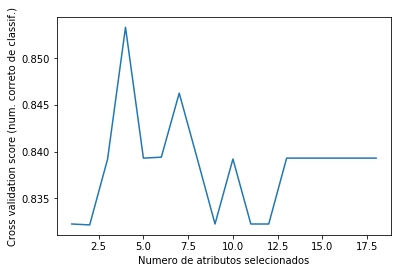


Composição dos atributos após KBest: (143, 4)

Atributos em ordem de importância:
exercised_stock_options 24.82
total_stock_value 24.18
bonus 20.79
salary 18.29



AdaBoost Accuracy: 0.837


In [14]:
# %load poi_id.py
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

#from sklearn.metrics import accuracy_score
from sklearn.metrics import *


### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".


'''
features_list = ['poi','salary'] # You will need to use more features

fin_features = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 
                'bonus', 'restricted_stock_deferred', 'deferred_income', 
                'total_stock_value', 'expenses', 'exercised_stock_options', 
                'other', 'long_term_incentive', 'restricted_stock', 'director_fees']

email_features = ['to_messages', 'email_address', 'from_poi_to_this_person', 
                  'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] 

(as unidades aqui são geralmente em número de emails; a exceção notável aqui 
 é o atributo ‘email_address’, que é uma string)
'''

# todos os atributos agrupados
all_features_list = ['poi', 'salary', 'deferral_payments', 'total_payments', 
                     'loan_advances', 'bonus', 'restricted_stock_deferred', 
                     'deferred_income', 'total_stock_value', 'expenses', 
                     'exercised_stock_options', 'other', 'long_term_incentive', 
                     'restricted_stock', 'director_fees', 'to_messages', 
                     'email_address', 'from_poi_to_this_person', 'from_messages', 
                     'from_this_person_to_poi', 'shared_receipt_with_poi'] 




# features a serem usadas incialmente
features_list = ['poi', 'salary', 'deferral_payments', 'total_payments', 
                 'loan_advances', 'bonus', 'restricted_stock_deferred', 
                 'deferred_income', 'total_stock_value', 'expenses', 
                 'exercised_stock_options', 'other', 'long_term_incentive', 
                 'restricted_stock', 'director_fees', 'from_poi_to_this_person', 
                 'from_this_person_to_poi']



### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

print "Quantidade de registros:", len(data_dict)

poi_q = 0
for users in data_dict:
    if data_dict[users]['poi'] == True:
        poi_q += 1
print "Quantidade de POIs:", poi_q
print "Quantidade de Não-POI:", len(data_dict)-poi_q
print "Quantidade total de atributos:", len(data_dict[data_dict.keys()[0]])



# identificação de NaN
print "\nidentificação de NaN...\n"
NaNfeatures = [0] * (len(all_features_list))

for x, user in enumerate(data_dict.values()):
    for y, feature in enumerate(all_features_list):
        if user[feature] == 'NaN':
            NaNfeatures[y] += 1

print "Atributo", "--", "Quantidade", "--", "Percentual do Total"
for x, feature in enumerate(all_features_list):
    print feature, " -- ", NaNfeatures[x], " -- ", round(float(
        NaNfeatures[x]) / len(data_dict), 3)*100

print "\n"    



### Task 2: Remove outliers
before_outliers = len(data_dict)
data_dict.pop("TOTAL") # identificado durante o curso
data_dict.pop("THE TRAVEL AGENCY IN THE PARK") # sugerido pelo avaliador na 1a submissão
data_dict.pop("LOCKHART EUGENE E") # sugerido pelo avaliador na 1a submissão

print "Quantidade de outliers:", before_outliers-len(data_dict)
print "\nQuantidade de registros após remoção de outliers:", len(data_dict)
print "\n"



### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
'''
Novos atributos, baseados nas mensagens:
     1. percentual de mensagens do POI para esta pessoa em comparação ao 
     total de mensagens "to"
           perc_from_poi = from_poi_to_this_person / to_messages

     2. percentual de mensagens desta pessoa para um POI em comparação ao 
     total de mensagens "from"
           perc_to_poi = from_this_person_to_poi / from_messages
'''

for users in data_dict:

    if "NaN" not in (data_dict[users]["from_poi_to_this_person"], 
                     data_dict[users]["to_messages"]):
        data_dict[users]['perc_from_poi'] = (data_dict[users]['from_poi_to_this_person']) 
        / float(data_dict[users]['to_messages'])
        
    else:
        data_dict[users]['perc_from_poi'] = 0

    if "NaN" not in (data_dict[users]["from_this_person_to_poi"],
                     data_dict[users]["from_messages"]):
        data_dict[users]['perc_to_poi'] = int(data_dict[users]['from_this_person_to_poi']) 
        / float(data_dict[users]['from_messages'])
        
    else:
        data_dict[users]['perc_to_poi'] = 0 

        
        
# Novos atributos adicionados `a lista
features_list = features_list + ['perc_from_poi', 'perc_to_poi']
print "Quantidade total de atributos com novos atributos:",
len(data_dict[data_dict.keys()[0]])


my_dataset = data_dict



### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)
print "\nQuantiade de atributos para análise:", len(features[0])



### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.

'''
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features, labels)
pred = clf.predict(features)
acc = accuracy_score(pred, labels)
print "GaussianNB Accuracy:", round(acc,3)
'''



'''
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(features, labels)
pred = clf.predict(features)
acc = accuracy_score(pred, labels)
print "\nLinearSVC Accuracy:", round(acc,3)
'''



''' Não funciona: processo com tempo extremamente elevado
from sklearn.svm import SVC
clf = SVC(kernel="linear")
clf.fit(features, labels)
pred = clf.predict(features)
acc = accuracy_score(pred, labels)
print "SVM Accuracy:", round(acc,3)
'''



'''
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(features, labels)
pred = clf.predict(features)
acc = accuracy_score(pred, labels)
print "LogisticRegression Accuracy:", round(acc,3)
'''



'''
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {'criterion': ('gini', 'entropy'),
'splitter': ('best', 'random'),'min_samples_split': np.arange(2, 10)}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid)
clf.fit(features, labels)
pred = clf.predict(features)
acc = accuracy_score(pred, labels)
print "\nDecisionTreeClassifier Accuracy:", round(acc,3)
'''



'''
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
clf = AdaBoostClassifier()
clf = clf.fit(features, labels)
pred = clf.predict(features)
acc = accuracy_score(pred, labels)
print "\nAdaBoost Accuracy:", round(acc,3)
'''



### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/
###sklearn.cross_validation.StratifiedShuffleSplit.html



# Identificar a quantidade ótima de atributos
# Retirado de:
# http://scikit-learn.org/stable/auto_examples/feature_selection/
# plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py
# Adaptado para AdaBoost
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
# Create the clf object and compute a cross-validated score.
clf = AdaBoostClassifier()
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(features, labels)
print("\nNúmero ótimo de atributos : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Numero de atributos selecionados")
plt.ylabel("Cross validation score (num. correto de classif.)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show();



# Com o KBest é possível selecionar, "transformar" e identificar a 
# importância de cada um dos atributos
# Primeiro rodou com k="all" para identificação de todos atributos úteis. Total = 18.
# Depois foi configurado em k9 (50%) e k=4 (25%).
# k=4 se mostrou com os melhores resultados.
# O processo RFECV, rodado antes, também indicou 4 como número ótimo de atributos.
# parâmetro k passou a ler o rfecv.n_features_
from sklearn.feature_selection import SelectKBest
from operator import itemgetter
selector = SelectKBest(k=rfecv.n_features_)
selector.fit(features, labels)
features_new = selector.transform(features)
print "\nComposição dos atributos após KBest:", features_new.shape
features_list_kb = []
for i in selector.get_support(indices=True):
#    print features_list[i+1], round(selector.scores_[i],2)
    features_list_kb.append([features_list[i+1], round(selector.scores_[i],2)])
#print selector.get_support(indices=True)
print "\nAtributos em ordem de importância:"
features_list_kb = sorted(features_list_kb, key=itemgetter(1), reverse=True) 
for sublst in features_list_kb:
    for item in sublst:
        print item,
    print
print "\n"
    
    

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features_new, labels, test_size=0.3, random_state=42)



# Normalização dos dados, visto que há atributos com valores em escalas diversas
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features_train)
features_train_scaled = scaler.transform(features_train)



# transformando os dados de teste
#print "transformando os dados de teste..."
features_test_scaled = scaler.transform(features_test)



# Classificadores
# Foram experimentados e analisados manualmente

'''
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_train_scaled, labels_train)
pred = clf.predict(features_test_scaled)
acc = accuracy_score(pred, labels_test)
print "\nGaussianNB Accuracy:", round(acc,3)
'''



''' 
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(features_train_scaled, labels_train)
pred = clf.predict(features_test_scaled)
acc = accuracy_score(pred, labels_test)
print "\nLinearSVC Accuracy:", round(acc,3)
'''



''' 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
acc = accuracy_score(pred, labels_test)
print "LogisticRegression Accuracy:", round(acc,3)
'''



''' 
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {'criterion': ('gini', 'entropy'), 'splitter':
              ('best', 'random'),'min_samples_split': np.arange(2, 10)}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
acc = accuracy_score(pred, labels_test)
print "\nDecisionTreeClassifier Accuracy:", round(acc,3)
''' 



# O AdaBoost foi o melhor classificador
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
clf = AdaBoostClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
acc = accuracy_score(pred, labels_test)
print "\nAdaBoost Accuracy:", round(acc,3)
 



### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

In [15]:
#!python tester.py

/Users/maxfc/Anaconda/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
	Accuracy: 0.84087	Precision: 0.37899	Recall: 0.30300	F1: 0.33676	F2: 0.31566
	Total predictions: 15000	True positives:  606	False positives:  993	False negatives: 1394	True negatives: 12007

